In [1]:
import warnings
warnings.filterwarnings('ignore')

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1 ) /255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

- keras에서 입력데이터가 3차원으로 구성되어 있을 것이라고 가정하고 있으므로 차원을 추가해서 channel차원으로 1을 추가하였음
- train set을 train 과 vaild로 구분

## 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

2022-07-21 17:29:46.063670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.add(
    keras.layers.Conv2D(
        32, # filter의 갯수 : 32
        kernel_size = 3, # 커널 : 3x3
        activation = 'relu',
        padding = 'same',
        input_shape = (28,28,1)
    )
)

In [5]:
model.add(keras.layers.MaxPooling2D(2))

<현재까지의 맥스플링 2로 만든 모습>
<img src = '../Data/맥스플링.png'>

In [6]:
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size=3,
        activation = 'relu',
        padding = 'same'
    )
)

In [7]:
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

---
## Model Compile과 훈련

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.5316 - accuracy: 0.8093 - val_loss: 0.3368 - val_accuracy: 0.8783
Epoch 2/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3591 - accuracy: 0.8721 - val_loss: 0.2737 - val_accuracy: 0.9003
Epoch 3/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3018 - accuracy: 0.8923 - val_loss: 0.2557 - val_accuracy: 0.9034
Epoch 4/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2745 - accuracy: 0.9000 - val_loss: 0.2436 - val_accuracy: 0.9093
Epoch 5/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2496 - accuracy: 0.9093 - val_loss: 0.2456 - val_accuracy: 0.9103
Epoch 6/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2307 - accuracy: 0.9160 - val_loss: 0.2290 - val_accuracy: 0.9189
Epoch 7/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2144 - accuracy: 0.9220 - val_loss: 0.2320 -

---
## 시각화 해보기

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


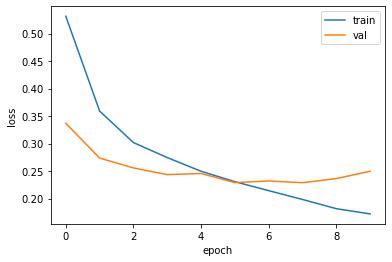

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
model.evaluate(train_scaled, train_target)

1500/1500 [==============================] - 9s 6ms/step - loss: 0.1408 - accuracy: 0.9467


[0.14083513617515564, 0.9466875195503235]

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2288 - accuracy: 0.9166


[0.22883373498916626, 0.9165833592414856]

---
## 이미지로 확인해보기

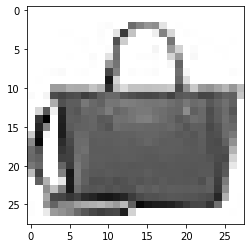

In [14]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()


In [15]:
pred = model.predict(val_scaled[0:1])
print(pred)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 164ms/step
[[3.7906880e-20 2.6064017e-28 1.0511979e-23 3.6906185e-22 4.0485144e-22
  1.1386037e-15 8.9217498e-22 4.7807094e-18 1.0000000e+00 4.2129924e-19]]


In [16]:
# 계단함수
import numpy as np
classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵글부츠']

In [17]:
print(classes[np.argmax(pred)])

가방


---
### 시험데이터를 확인하기(일반화 성능 측정)

In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) /255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2493 - accuracy: 0.9097


[0.2492680847644806, 0.9096999764442444]